# Thermodynamics correlations for pure components




En esta sección se muestra la class *Thermodynamic_correlations()* la cual permite realizar el cálculo de propiedades termodinámicas de sustancias puras como una función de la temperatura. En este caso se pueden tener 6 situaciones para cada una de las 13 propiedades termofísicas soportadas:

1. Especificar una sustancia pura sin especificar una temperatura. En este caso por defecto la propiedad termodinámica se calcula entre el intervalo mínimo y máximo de validez experimental para cada correlación.

2. Especificar una sustancia pura y especificar una temperatura. 

3. Especificar una sustancia pura y especificar varias temperaturas.

4. Especificar varias sustancias puras sin especificar una temperatura.

5. Especificar varias sustancias puras y especificar una temperatura.

6. Especificar  varias sustancias puras y especificar varias temperaturas

la clase *Thermodynamics_correlations* es usada para calcular 13 propiedades termodinámicas de sustancias puras en función de la temperatura y se sigue la siguente convención para presentar identificar las propiedades termodinámicas

property thermodynamics = name property, units, correlation, equation

The thermodynamic correlations are:

-**Solid_Density** = "Solid Density", "[kmol/m^3]", "A+B*T+C*T^2+D*T^3+E*T^4", 0

-**Liquid_Density** = "Liquid Density", "[kmol/m^3]", "A/B^(1+(1-T/C)^D)", 1

-**Vapour_Pressure** = "Vapour Pressure", "[Bar]", "exp(A+B/T+C*ln(T)+D*T^E) * 1e-5", 2

-**Heat_of_Vaporization** = "Heat of Vaporization", "[J/kmol]", "A*(1-Tr)^(B+C*Tr+D*Tr^2)", 3

-**Solid_Heat_Capacity** = "Solid Heat Capacity", "[J/(kmol*K)]", "A+B*T+C*T^2+D*T^3+E*T^4", 4

-**Liquid_Heat_Capacity** = "Liquid Heat Capacity", "[J/(kmol*K)]", "A^2/(1-Tr)+B-2*A*C*(1-Tr)-A*D*(1-Tr)^2-C^2*(1-Tr)^3/3-C*D*(1-Tr)^4/2-D^2*(1-Tr)^5/5", 5

-**Ideal_Gas_Heat_Capacity** = "Ideal Gas Heat Capacity" "[J/(kmol*K)]", "A+B*(C/T/sinh(C/T))^2+D*(E/T/cosh(E/T))^2", 6

-**Second_Virial_Coefficient** = "Second	Virial	Coefficient", "[m^3/kmol]", "A+B/T+C/T^3+D/T^8+E/T^9", 7

-**Liquid_Viscosity** = "Liquid	Viscosity", "[kg/(m*s)]", "exp(A+B/T+C*ln(T)+D*T^E)", 8

-**Vapour_Viscosity** = "Vapour	Viscosity", "[kg/(m*s)]", "A*T^B/(1+C/T+D/T^2)", 9

-**Liquid_Thermal_Conductivity** = "Liquid Thermal Conductivity", "[J/(m*s*K)]", "A+B*T+C*T^2+D*T^3+E*T^4", 10

-**Vapour_Thermal_Conductivity** = "Vapour Thermal Conductivity", "[J/(m*s*K)]", "A*T^B/(1+C/T+D/T^2)", 11

-**Surface_Tension** = "Surface Tension", "[kg/s^2]", "A*(1-Tr)^(B+C*Tr+D*Tr^2)", 12	

Para empezar se importan las librerías que se van a utilizar, que en este caso son numpy, pandas, pyther y especificar que las figuras generadas se muesten dentro del jupyter notebook

In [1]:
import numpy as np
import pandas as pd
import pyther as pt
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Especificar una sustancia pura sin especificar una temperatura.

Luego se carga el archivo que contine las constantes de las correlaciones de las propiedades termodinamicas, que se llama en este caso *"PureFull_mod_properties.xls"* y se asigna a la variable *dppr_file*.

Creamos un objeto llamado **thermodynamic_correlations** y se pasan como parametros las variables **component** y **property_thermodynamics** que en el ejemplo se especifica para el componente METHANE la Vapour_Pressure

In [3]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = ['METHANE']
property_thermodynamics = "Vapour_Pressure"

Vapour_Pressure = thermodynamic_correlations.property_cal(component, property_thermodynamics)
print("Vapour Pressure = {0}". format(Vapour_Pressure))


----------------------------------------------------------------------
One component without temperature especific: ['METHANE']
----------------------------------------------------------------------
Vapour Pressure = [  0.11687017   0.13272851   0.15029231   0.1696935    0.19106965
   0.21456383   0.24032459   0.26850587   0.29926689   0.33277204
   0.36919081   0.40869762   0.45147173   0.49769708   0.54756216
   0.60125987   0.65898737   0.72094595   0.78734085   0.85838113
   0.93427952   1.01525227   1.101519     1.19330257   1.29082892
   1.39432695   1.50402838   1.62016765   1.74298174   1.87271013
   2.00959463   2.1538793    2.30581038   2.46563616   2.63360692
   2.80997486   2.99499402   3.18892023   3.39201109   3.60452587
   3.82672552   4.05887261   4.30123136   4.55406758   4.8176487
   5.09224376   5.37812343   5.67556002   5.98482753   6.30620166
   6.63995987   6.98638141   7.34574742   7.71834093   8.10444699
   8.5043527    8.91834734   9.34672242   9.78977179  10.2

para realizar un gráfico simple de la propiedad termodinámica se utiliza el método **graphical(temperature, property_thermodynamics, label_property_thermodynamics, units)**.

En donde se pasan como argumentos la temperatura a la cual se claculó la propiedad termodinamica, los valores calculados de la propiedad termodinamica, el label de la propiedad termodinámica y las unidades correspondientes de temperatura y la propiedad termodinámica en cada caso.

('K', '[Pa]')


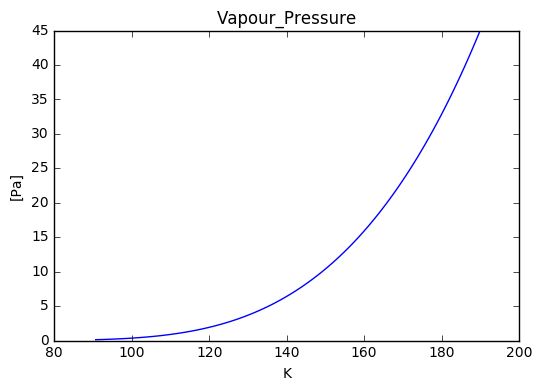

In [4]:
temperature_vapour = thermodynamic_correlations.temperature
units = thermodynamic_correlations.units
print(units)

thermodynamic_correlations.graphical(temperature_vapour, Vapour_Pressure, property_thermodynamics, units)

# 2. Especificar una sustancia pura y una temperatura. 



Siguiendo con la sustacia pura *METHANE* se tiene el segundo caso en el cual ademas de especificiar el componente se especifica también solo un valor de temperatura, tal como se muestra en la variable *temperature*.

Dado que cada correlación de propiedad termodinámica tiene un rango mínimo y máximo de temperatura en la cual es valida, al especificar un valor de temperatura se hace una verificación para determinar si la temperatura ingresada se encuentra entre el intervalo aceptado para cada componente y cada propiedad termodinámica. En caso contrario la temperatura se clasifica como invalida y no se obtiene valor para la propiedad termodinámica seleccionada.

In [5]:
component = ['METHANE']
property_thermodynamics = "Vapour_Pressure"
temperature = [180.4]

Vapour_Pressure = thermodynamic_correlations.property_cal(component, property_thermodynamics, temperature)
print("Vapour Pressure = {0} {1}". format(Vapour_Pressure, units[1]))


----------------------------------------------------------------------
One component with a temperature especific: ['METHANE']
----------------------------------------------------------------------
Temperature_enter = [180.4]
Temperature_invalid = []
Temperature_valid = [180.4]
----------------------------------------------------------------------
Vapour Pressure = [ 33.32655377] [Pa]


# 3. Especificar una sustancia pura y especificar varias temperaturas.



Ahora se tiene la situación de contar con un solo componente "METHANE" sin embargo, esta vez se especifica varios valores para la temperatura en las cuales se quiere determinar el correspondiente valor de una proiedad termodinámica, que como en los casos anteriores es la *Vapour_Pressure*.

In [6]:
component = ['METHANE']
property_thermodynamics = "Vapour_Pressure"
temperature = [180.4, 181.4, 185.3, 210, 85]

Vapour_Pressure = thermodynamic_correlations.property_cal(component, "Vapour_Pressure", temperature)
print("Vapour Pressure = {0} {1}". format(Vapour_Pressure, units[1]))

----------------------------------------------------------------------
One component with a temperature especific: ['METHANE']
----------------------------------------------------------------------
Temperature_enter = [180.4, 181.4, 185.3, '210 K is a temperature not valid', '85 K is a temperature not valid']
Temperature_invalid = ['210 K is a temperature not valid', '85 K is a temperature not valid']
Temperature_valid = [180.4, 181.4, 185.3]
----------------------------------------------------------------------
Vapour Pressure = [ 33.32655377  34.43422601  39.01608023] [Pa]


Se debe notar que al ingresar una serie de valores de temperatura, en este caso 5 valores, se obtienen solo 3 valores de la propiedad termodinámica. Esto se debe a que para este caso 2 valores de temperatura no se encuentran en el valor mínimo y máximo en donde es valida la correlación termodinámica. Por tanto, esto se avisa por medio del mensaje: *Temperature_invalid = ['210 K is a temperature not valid', '85 K is a temperature not valid']*  

# 4. Especificar varias sustancias puras sin especificar una temperatura.



Otra de las posibilidades que se puede tener es la opción de especificar varios componentes para una misma propiedad termodinámica sin que se especifique una o más valores de temperatura. En esta opción se pueden ingresar multiples componentes sin un limite, siempre y cuando estén en la base de datos con la que se trabaja o en dado caso sean agregados a la base de datos nuevas correlaciones para sustancias puras *Ver sección base de datos*. Para este ejemplo se utiliza una *list components* con 3 sustancias puras por cuestiones de visibilidad de las gráficas de *Vapour_Pressure*.


In [7]:
components = ["METHANE", "n-TETRACOSANE", "ISOBUTANE"]
property_thermodynamics = "Vapour_Pressure"

Vapour_Pressure = thermodynamic_correlations.property_cal(components, property_thermodynamics)
temperature_vapour = thermodynamic_correlations.temperature

por medio del método *multi_graphical(components, temperature, property_thermodynamics)* al cual se pasan los parámetros correspondiente a las sustancias puras, la temperatura a la cual se realiza el calculo de la propiedad termodinámica y los valores de la propiedad termodinámica de cada sustancia pura, para obtener la siguiente figura.

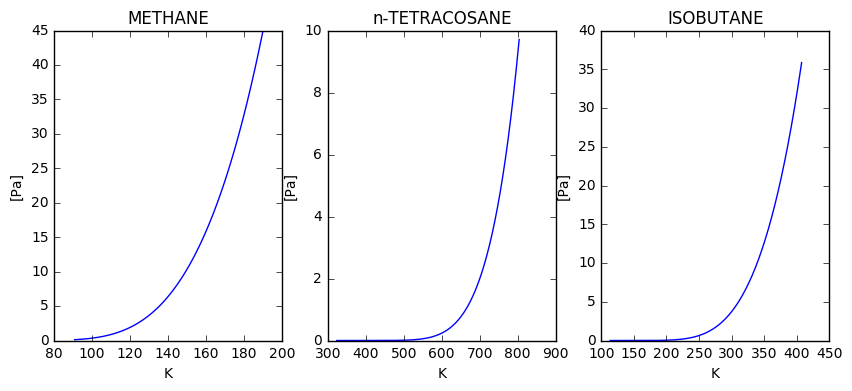

In [8]:

thermodynamic_correlations.multi_graphical(components, temperature_vapour, Vapour_Pressure)

sin embargo como se menciono anteriormente, es posible calcular una propiedad termodinámica para un gran número de sustancias puras y luego realizar las gráficas correspondientes dependiendo de las necesidades de visualización entre otros criterios. Para ejemplificar esto, ahora se tienen 7 sustancias puras y se quiere gŕaficar la propiedad termodinámica de solo: *n-PENTACOSANE, ETHANE y el ISOBUTANE*. 

In [9]:
components = ["METHANE", "n-TETRACOSANE", "n-PENTACOSANE", "ETHANE", "ISOBUTANE", "PROPANE", "3-METHYLHEPTANE"]
property_thermodynamics = "Vapour_Pressure"

Vapour_Pressure = thermodynamic_correlations.property_cal(components, property_thermodynamics)
temperature_vapour = thermodynamic_correlations.temperature

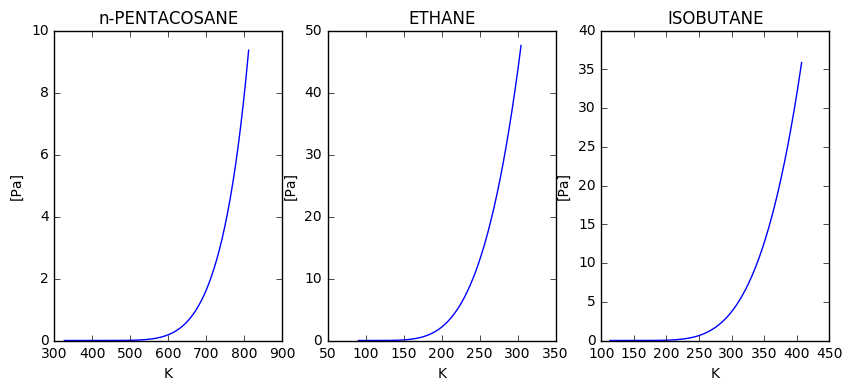

In [10]:
thermodynamic_correlations.multi_graphical(components[2:5], temperature_vapour[2:5], Vapour_Pressure[2:5])

# 5. Especificar varias sustancias puras y una temperatura.



Como en el caso anterios, en este ejemplo se espcifican 3 sustancias puras pero con la especificación de un solo valor de temperatura. Esta temperatura será común para las sustancias puras con las que se trabaje por tanto puede darse el caso de que sea una temperatura valida para algunas sustancias puras mientras que para otras no dependiendo del intervalo de valides de cada correlación termodinámica.

In [15]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

components = ["METHANE", "n-TETRACOSANE", "ISOBUTANE"]
property_thermodynamics = "Vapour_Pressure"
temperature = [180.4]

Vapour_Pressure = thermodynamic_correlations.property_cal(components, property_thermodynamics, temperature)
print("Vapour Pressure = {0} {1}". format(Vapour_Pressure, units[1]))



----------------------------------------------------------------------
One component with a temperature especific: ['METHANE', 'n-TETRACOSANE', 'ISOBUTANE']
----------------------------------------------------------------------
[180.4]
Temperature_enter = [[180.4], ['180.4 K is a temperature not valid'], [180.4]]
Temperature_invalid = [[], ['180.4 K is a temperature not valid'], []]
Temperature_valid = [array([ 180.4]), array([], dtype=float64), array([ 180.4])]
vapour_Pressure =  [array([ 33.32655377]) array([], dtype=float64) array([ 0.0074373])] (3,)
3
Vapour Pressure = [array([ 33.32655377]) array([], dtype=float64) array([ 0.0074373])] [Pa]


en este caso se tiene como resultado un con 2 valores de presión de vapor, uno para METHANE y otro para ISOBUTANE, mientras que se obtiene un array vacio en el caso "de n-TETRACOSANE, puesto que la temperatura de 180 K especificada no se encuentra como valida.

para verificar tanto los valores de las constantes como los valores mínimos y máximos de cada correlación termodinámica para cada una de las sustancias puras que se especifique se utiliza el atributo *component_constans* tal como se muestra a continuación

In [16]:
thermodynamic_correlations.component_constans


,A,B,C,D,E,T Min [K],T Max [K]
METHANE,39.205,-1324.4,-3.4366,3.1019e-05,2,90.69,190.56
n-TETRACOSANE,211.42,-21711,-26.255,7.7485e-06,2,323.75,804
ISOBUTANE,100.18,-4841.9,-13.541,0.020063,1,113.54,408.14


# 6. Especificar  varias sustancias puras y especificar varias temperaturas

In [1]:
import numpy as np
import pandas as pd
import pyther as pt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

components = ["METHANE", "n-TETRACOSANE", "ISOBUTANE"]
property_thermodynamics = "Vapour_Pressure"
temperature = [180.4, 181.4, 185.3, 210, 800]

Vapour_Pressure = thermodynamic_correlations.property_cal(components, property_thermodynamics, temperature)
print("Vapour Pressure = {0}". format(Vapour_Pressure))

----------------------------------------------------------------------
Pure substances with a temperature especific: ['METHANE', 'n-TETRACOSANE', 'ISOBUTANE']
----------------------------------------------------------------------
[180.4, 181.4, 185.3, 210, 800]
Temperature_enter = [[180.4, 181.4, 185.3, '210 K is a temperature not valid', '800 K is a temperature not valid'], ['180.4 K is a temperature not valid', '181.4 K is a temperature not valid', '185.3 K is a temperature not valid', '210 K is a temperature not valid', 800], [180.4, 181.4, 185.3, 210, '800 K is a temperature not valid']]
Temperature_invalid = [['210 K is a temperature not valid', '800 K is a temperature not valid'], ['180.4 K is a temperature not valid', '181.4 K is a temperature not valid', '185.3 K is a temperature not valid', '210 K is a temperature not valid'], ['800 K is a temperature not valid']]
Temperature_valid = [array([ 180.4,  181.4,  185.3]), array([800]), array([ 180.4,  181.4,  185.3,  210. ])]
3
Vap

In [45]:
temperature


[180.4, 181.4, 185.3, 210, 800]

In [46]:
thermodynamic_correlations.temperature_enter

[[180.4,
  181.4,
  185.3,
  '210 K is a temperature not valid',
  '800 K is a temperature not valid'],
 ['180.4 K is a temperature not valid',
  '181.4 K is a temperature not valid',
  '185.3 K is a temperature not valid',
  '210 K is a temperature not valid',
  800],
 [180.4, 181.4, 185.3, 210, '800 K is a temperature not valid']]

In [73]:
[type(thermodynamic_correlations.temperature_enter[0][i])!= str for i in range(len(temperature))]

[True, True, True, False, False]

In [74]:
[type(thermodynamic_correlations.temperature_enter[1][i])!= str for i in range(len(temperature))]

[False, False, False, False, True]

In [76]:
[type(thermodynamic_correlations.temperature_enter[2][i])!= str for i in range(len(temperature))]

[True, True, True, True, False]

In [77]:
Vapour_Pressure[0]

array([ 33.32655377,  34.43422601,  39.01608023])

In [107]:
con0 = [type(thermodynamic_correlations.temperature_enter[0][i])!= str for i in range(len(temperature))]
[Vapour_Pressure[0][vp] if con0[vp]== True else None for vp in range(len(temperature))]


[33.326553767513083, 34.434226007325073, 39.016080233753712, None, None]

In [108]:
con1 = [type(thermodynamic_correlations.temperature_enter[1][i])!= str for i in range(len(temperature))]
[Vapour_Pressure[1][vp] if con1[vp]== True else None for vp in range(len(temperature))]


IndexError: index 4 is out of bounds for axis 0 with size 1

In [109]:
con2 = [type(thermodynamic_correlations.temperature_enter[2][i])!= str for i in range(len(temperature))]
[Vapour_Pressure[2][vp] if con2[vp]== True else None for vp in range(len(temperature))]

[0.0074373018362786265,
 0.0081635296813054956,
 0.011607663539306267,
 0.075657008061391431,
 None]

In [ ]:
 [([i if Min[j] < i < Max[j] else "{0} K is a temperature not valid".format(i) for i in temperature]) for j in range(0, len(components))]


In [67]:
[i for i in thermodynamic_correlations.temperature_enter if type(thermodynamic_correlations.temperature_enter[0][i])== str]

TypeError: list indices must be integers or slices, not list

In [48]:
thermodynamic_correlations.temperature_invalid

[['210 K is a temperature not valid', '800 K is a temperature not valid'],
 ['180.4 K is a temperature not valid',
  '181.4 K is a temperature not valid',
  '185.3 K is a temperature not valid',
  '210 K is a temperature not valid'],
 ['800 K is a temperature not valid']]

In [49]:
thermodynamic_correlations.temperature_valid

[array([ 180.4,  181.4,  185.3]),
 array([800]),
 array([ 180.4,  181.4,  185.3,  210. ])]

In [53]:
np.zeros([len(components), len(temperature)])

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [56]:
np.shape(Vapour_Pressure)

(3,)

In [19]:
str(temperature)

'[180.4, 181.4, 185.3, 210, 800]'

In [42]:
t = [str(temp)+" K" for temp in temperature]
t

['180.4 K', '181.4 K', '185.3 K', '210 K', '800 K']

In [43]:
data = np.ones([3,5])
#table = pd.DataFrame(data=data,index= components, columns=['180.4', '181.4', '185.3'])
table = pd.DataFrame(data=data,index= components, columns=t)

table


,180.4 K,181.4 K,185.3 K,210 K,800 K
METHANE,1.0,1.0,1.0,1.0,1.0
n-TETRACOSANE,1.0,1.0,1.0,1.0,1.0
ISOBUTANE,1.0,1.0,1.0,1.0,1.0


In [33]:
table_components = pd.DataFrame(data=Vapour_Pressure,index= components, columns=[str(temperature)])


In [30]:
table_components

,"[180.4, 181.4, 185.3, 210, 800]"
METHANE,"[33.3265537675, 34.4342260073, 39.0160802338]"
n-TETRACOSANE,[9.233919674]
ISOBUTANE,"[0.00743730183628, 0.00816352968131, 0.0116076..."


In [3]:
thermodynamic_correlations.table_properties()

TypeError: 'NoneType' object is not subscriptable

In [6]:
dppr_file = "PureFull_mod_properties.xls"

thermodynamic_correlations = pt.Thermodynamic_correlations(dppr_file)

component = ['METHANE']

liquid_density = thermodynamic_correlations.property_cal(component, "Liquid_Density")
units = thermodynamic_correlations.units
temperature = thermodynamic_correlations.temperature

print("Liquid_Density = {0} {1}".format(liquid_density, units))
print(temperature)


One component without temperature especific
Liquid_Density = [array([28.179948075677302], dtype=object)
 array([28.096011735126183], dtype=object)
 array([28.011722157828235], dtype=object)
 array([27.92707347437296], dtype=object)
 array([27.84205965663301], dtype=object)
 array([27.756674511758128], dtype=object)
 array([27.67091167587576], dtype=object)
 array([27.584764607480373], dtype=object)
 array([27.498226580492847], dtype=object)
 array([27.411290676969546], dtype=object)
 array([27.323949779439292], dtype=object)
 array([27.236196562844896], dtype=object)
 array([27.1480234860642], dtype=object)
 array([27.059422782983436], dtype=object)
 array([26.970386453094005], dtype=object)
 array([26.88090625158119], dtype=object)
 array([26.790973678871108], dtype=object)
 array([26.700579969599243], dtype=object)
 array([26.609716080961462], dtype=object)
 array([26.51837268040447], dtype=object)
 array([26.426540132610004], dtype=object)
 array([26.334208485722485], dtype=object)


# 7. Future work


- Actualmente PyTher se encuentra implementando la opción de multiples propiedades termodinámicas de forma simultanea  para el caso de multiples sustancias puras con multiples opciones de temepratura.


- Dar soporte a la manipulación de bases de datos por parte de usuarios para agregar, modificar, eliminar, renombrar sustancias puras y/o correlaciones termodinámicas.

# 8. References

Numpy